# **Import Libraries and modules**

In [1]:
# https://keras.io/
#We are first installing the keras package via pip install and importing the keras package
!pip install -q keras
import keras

In [2]:
# importing the numpy package with the alias np
import numpy as np

# importing sequential model from keras.models
from keras.models import Sequential
# importing different layers and activations from keras.layers
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
# importing np_utils from keras.utils
from keras.utils import np_utils

# importing the mnist dataset from keras.datasets 
from keras.datasets import mnist

# We are importing the Adam Optimizer
from keras.optimizers import Adam

# importing Activation, BatchNormalization and MaxPooling2D from keras.layers 
# for performing maxpooling and batchnormalizing operations and adding non linearity via activation functions

from keras.layers import Activation,BatchNormalization

# We are importing the learningratescheduler callback
from keras.callbacks import LearningRateScheduler

# importing pyplot with alias plt from matplotlib package
from matplotlib import pyplot as plt
# %matplotlib inline is a magic function to show us the plots in a notebook
%matplotlib inline

### Load pre-shuffled MNIST data into train and test sets

In [3]:
# we are downloading the MNIST dataset and splitting the data for training and testing
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


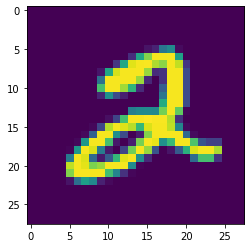

In [4]:
# printing out the shape of x_train
print (X_train.shape)

# plotting the first image or the image at index zero in the training dataset
plt.imshow(X_train[5])

In [5]:
#Reshaping our training and testing datatset using numpy's reshape function which we will feed to the model
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [6]:
#Doing type conversion or changing the datatype to float32 for the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#Doing standardization or normalization here dividind each pixel by 255 in the train and test data
X_train /= 255
X_test /= 255

In [7]:
type(X_train)

numpy.ndarray

In [8]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [9]:
#Checking first 10 image labels
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [10]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# simply we can say we are doing sort of onehot encoding
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [11]:
# having a look in the first 10 datapoints after onehot encoding
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [38]:
# building our sequential model using the Sequential class and creating the model object
model = Sequential()

# Performing 2dconvolution followed by BatchNormalization and Dropout
model.add(Convolution2D(filters=10, kernel_size=(3,3) , activation='relu', input_shape=(28,28,1))) # channel dimensions = 26x26x16    and Receptive field = 3x3
model.add(BatchNormalization())

# Performing 2dconvolution followed by BatchNormalization and Dropout        
model.add(Convolution2D(filters=10, kernel_size=(3,3), activation='relu'))                        # channel dimensions = 24x24x16    and Receptive field = 5x5
model.add(BatchNormalization())

# Performing 2dconvolution followed Maxpoooling operation
model.add(Convolution2D(filters=10, kernel_size=(3,3), activation='relu'))                     # channel dimensions = 22x22x16    and Receptive field = 7x7 using 1x1 kernel
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))                                 # channel dimensions = 11x11x16    and Receptive field = 14x14

# Performing 2dconvolution followed by BatchNormalization and Dropout
model.add(Convolution2D(16, kernel_size=(3,3), activation='LeakyReLU'))                     # channel dimensions = 9x9x16    and Receptive field = 16x16
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model.add(Convolution2D(16, kernel_size=(3,3), activation='ELU'))#8                      # channel dimensions = 8x8x16    and Receptive field = 14x14
model.add(BatchNormalization())

# # Performing 2dconvolution followed by BatchNormalization and Dropout
model.add(Convolution2D(16,kernel_size=(3,3), activation='relu'))#6                      # channel dimensions = 6x6x16    and Receptive field = 16x16
model.add(BatchNormalization())
model.add(Dropout(0.1))
# # Performing 2dconvolution followed by BatchNormalization and Dropout
# model.add(Convolution2D(16, 3, 3, activation='relu'))#4                      # channel dimensions = 4x4x16    and Receptive field = 20x20
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# Performing only 2dconvolution at the last convolution layer(no batchnormalization and dropout)
# using 4x4 kernel to see the complete image

model.add(Convolution2D(10, 3, 3))                       # channel dimensions = 1x1x10    and Receptive field = 22x22

# Here we are Flateening our dat i.e making it one dimensional which we will feed to the network.
model.add(Flatten())
#Using softmax activation function at the last layer which is used for multi class classification
model.add(Activation('softmax'))


In [39]:
# Seeing the summary of the complete model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_9 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 10)        910       
_________________________________________________________________
batch_normalization_10 (Batc (None, 24, 24, 10)        40        
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 22, 22, 10)        910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 10)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 9, 9, 16)         

In [40]:
#Creating the "scheduler" function with two arguments i.e learningrate and epoch
def scheduler(epoch, learning_rate):
  new_lr = round(0.003 * 1/(1 + 0.319 * epoch), 10)
  print(f'New LR : {new_lr}')
  return new_lr

#	LearningRate = LearningRate * 1/(1 + decay * epoch) here decay is 0.319 and epoch is 10.

# here we are compiling our model and using 'categorical_crossentropy' as our loss function and adam as our optimizer with learning rate =0.003 and metrics is accuracy
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [41]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop_cb = EarlyStopping(patience = 5, restore_best_weights=True)

In [42]:
# Model Train

# Here we are traing our model using the data and using batch size of 128,number of epochs are 20 and using verbose=1 for printing out all the results.
# In the callbacks parameter we are using the LearningRateScheduler which takes two arguments scheduler function which we built earlier to reduce the learning rate in each decay and verbose =1
model.fit(X_train, 
          Y_train, 
          batch_size=32, 
          epochs=20,
          steps_per_epoch=1000,
          validation_steps=20, 
          verbose=1,
          validation_data=(X_test, Y_test), 
          callbacks=[early_stop_cb,LearningRateScheduler(scheduler, verbose=1)])

Epoch 1/20
New LR : 0.003

Epoch 00001: LearningRateScheduler reducing learning rate to 0.003.
1000/1000 [==============================] - 7s 5ms/step - loss: 0.4865 - accuracy: 0.8435 - val_loss: 0.1185 - val_accuracy: 0.9672
Epoch 2/20
New LR : 0.0022744503

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0022744503.
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0876 - accuracy: 0.9715 - val_loss: 0.0513 - val_accuracy: 0.9891
Epoch 3/20
New LR : 0.0018315018

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0018315018.
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0674 - accuracy: 0.9781 - val_loss: 0.0512 - val_accuracy: 0.9844
Epoch 4/20
New LR : 0.0015329586

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0015329586.
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0684 - accuracy: 0.9786 - val_loss: 0.0637 - val_accuracy: 0.9797
Epoch 5/20
New LR : 0.0013181019

Epoch 00005:

### Acheiving validation accuracy 99.40 in 16th epoch.

In [43]:
# Here we are evaluating our model using the test data and saving the results in score variable
score = model.evaluate(X_test, Y_test, verbose=0)

In [44]:
#printing the score or evaluation results
print(score)

[0.029424523934721947, 0.9909999966621399]


In [20]:
#Finally we are doing the predictions
y_pred = model.predict(X_test)

In [23]:
# Showing the results of predictions
print("Predicted : ", np.argmax(y_pred[:25], axis=-1))
print("Actual val :",y_test[:25])

Predicted :  [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]
Actual val : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]
